In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2024-05-13 22:38:54.601018: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 22:38:57.136145: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 22:39:05.607062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 22:39:25.005596: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.getcwd()

'/home/kevin/traffic_signs/roadtrafficsigns'

In [3]:
os.chdir('/home/kevin')

In [53]:
dataset_directory = "trafficsigns_dataset"

#Gets class names by listing directories
class_names = sorted(os.listdir(dataset_directory))  # Ensure it's sorted to match the order used by TensorFlow
print("Class names:", class_names)

#prints class name and corresponding index
print("Class names and their corresponding indices:")
for index, name in enumerate(class_names):
    print(f"Class {index}: {name}")

Class names: ['diamond', 'hex', 'round', 'square', 'triangle']
Class names and their corresponding indices:
Class 0: diamond
Class 1: hex
Class 2: round
Class 3: square
Class 4: triangle


In [29]:
# #augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     #20 validation split
#     validation_split=0.2
# )


In [55]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [65]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    'trafficsigns_dataset',  # Make sure this path is correct
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',  # Since your model input_shape is (28, 28, 1)
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'trafficsigns_dataset',  # Make sure this path is correct
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',  # Since your model input_shape is (28, 28, 1)
    class_mode='categorical',
    subset='validation'
)

Found 2946 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [61]:
train_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
validation_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')

In [44]:
# # Directory where your images are stored
# directory = 'trafficsigns_dataset'

# # Training generator
# train_generator = datagen.flow_from_directory(
#     directory,
#     target_size=(28, 28),
#     batch_size=32,
#     color_mode='grayscale',
#     class_mode='categorical',
#     subset='training'
# )

# # Validation generator
# validation_generator = datagen.flow_from_directory(
#     directory,
#     target_size=(28, 28),
#     batch_size=32,
#     color_mode='grayscale',
#     class_mode='categorical',
#     subset='validation'
# )

In [62]:
import scipy
from scipy.ndimage import gaussian_filter, binary_dilation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [66]:
#confirming shape of images
batch_size = 32
train_dataset = train_generator[0]

# Print the shapes of the images and labels
print("Images shape:", train_dataset[0].shape)
print("Labels shape:", train_dataset[1].shape)

Images shape: (32, 28, 28, 1)
Labels shape: (32, 5)


In [83]:
import warnings
warnings.filterwarnings('ignore')

num_classes = 5

model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20, verbose=0,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

2024-05-13 23:14:11.822423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:14:11.835051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:14:13.617361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:14:13.627907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:14:15.429496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:14:15.439015: W tensorflow/core/framework/local_rendezvous.cc:404]

### plot Validation Loss and Training Loss

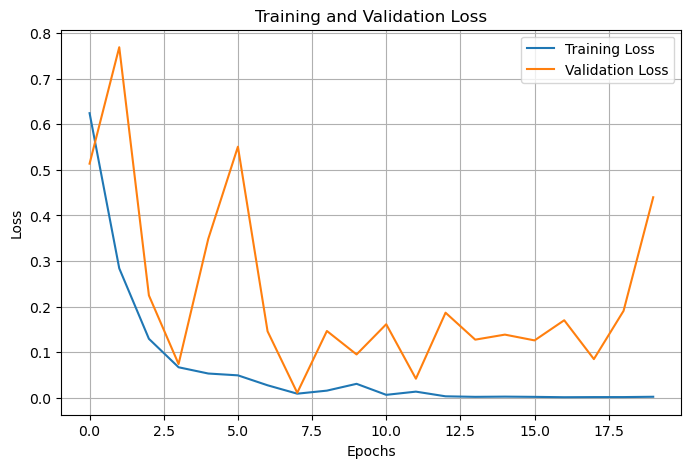

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Plot Validation Accuracy and Training Accuracy

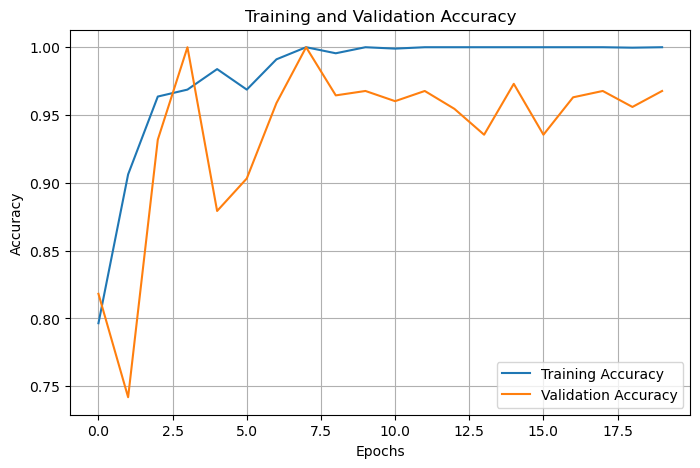

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Change 'loss' to 'accuracy'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Change 'val_loss' to 'val_accuracy'
plt.title('Training and Validation Accuracy')  # Change title to Accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Change Y-axis label to Accuracy
plt.legend()
plt.grid(True)
plt.show()

### Validation Accuracy

In [86]:
model.evaluate(validation_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9500 - loss: 0.3080


[0.21158245205879211, 0.9523809552192688]

In [100]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random

def load_and_preprocess_image(img_path):
    # Load image
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    # Convert image to array
    img_array = image.img_to_array(img)
    # Normalize image
    img_array /= 255.0
    # Expand dimensions to match batch size
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [102]:
import os
import random

def choose_random_images_from_subfolders(directory, num_images=3):
    # List to store paths of all images
    all_images = []
    
    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                all_images.append(os.path.join(root, file))
    
    # Randomly select num_images from the list of all images
    if len(all_images) >= num_images:
        chosen_images = random.sample(all_images, num_images)
    else:
        chosen_images = all_images  # Return all images if there aren't enough to sample
    
    return chosen_images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


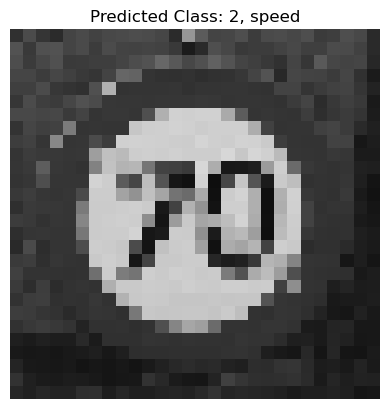

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


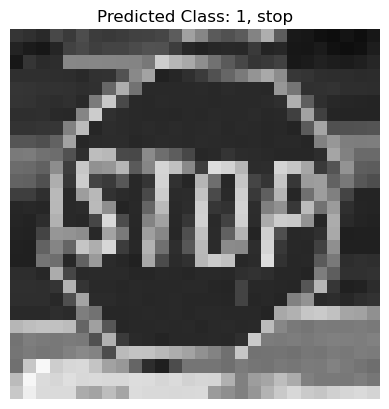

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


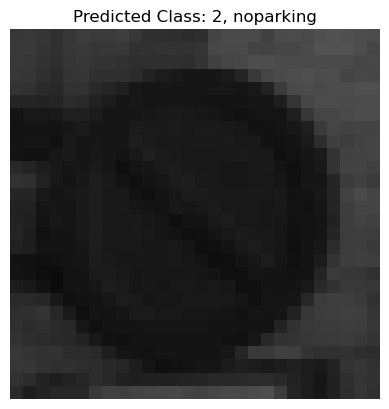

In [109]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random

def load_and_preprocess_image(img_path):
    # Load image and convert to array
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    # Normalize image
    img_array /= 255.0
    # Expand dimensions to match batch size
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def choose_random_images_from_subfolders(directory, num_images=3):
    all_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png')):
                all_images.append(os.path.join(root, file))
    if len(all_images) >= num_images:
        chosen_images = random.sample(all_images, num_images)
    else:
        chosen_images = all_images
    return chosen_images

# Directory containing images you want to test, organized in subfolders
test_directory = 'trafficsigns_dataset'

# Choose 3 random images from subfolders
random_images = choose_random_images_from_subfolders(test_directory)

# Load and preprocess each image, then predict
for img_path in random_images:
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    # Display image with predicted class and folder name
    img = image.load_img(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    folder_name = os.path.basename(os.path.dirname(img_path))
    plt.title(f"Predicted Class: {predicted_class[0]}, {folder_name}")
    plt.show()

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize the image pixels values
    rotation_range=20,  # Random rotations between -20 to 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Strategy to fill newly created pixels
)

# For validation data, usually, no augmentation is applied, just rescaling.
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [90]:
train_generator = train_datagen.flow_from_directory(
    'trafficsigns_dataset',  # Make sure this path is correct
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',  # Since your model input_shape is (28, 28, 1)
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'trafficsigns_dataset',  # Make sure this path is correct
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',  # Since your model input_shape is (28, 28, 1)
    class_mode='categorical',
    subset='validation'
)

Found 3681 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [94]:
import warnings
warnings.filterwarnings('ignore')

num_classes = 5

model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20, verbose=0,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

2024-05-13 23:19:42.819320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:19:42.832122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:19:46.191954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:19:46.201435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:19:49.910575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 23:19:49.921006: W tensorflow/core/framework/local_rendezvous.cc:404]

### Training and Validation Loss (augmentation)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Training and Validation Accuracy (augmentation)

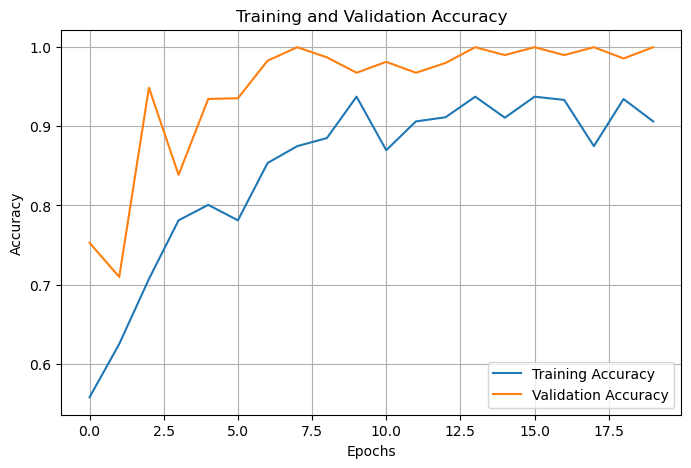

In [96]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Change 'loss' to 'accuracy'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Change 'val_loss' to 'val_accuracy'
plt.title('Training and Validation Accuracy')  # Change title to Accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Change Y-axis label to Accuracy
plt.legend()
plt.grid(True)
plt.show()

In [97]:
model.evaluate(validation_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9898 - loss: 0.0509


[0.051099441945552826, 0.9904761910438538]

### Image Prediction

### Type classification model

In [14]:
# Do not run unless using google colab
# !unzip trafficsigns_dataset_withtype.zip
# %ls

In [15]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import zipfile
with zipfile.ZipFile('./types.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

sign_type_class_names = ['rightofway','stop','bicycle','limitedtraffic','noentry','noparking','roundabout','speed','trafficdirective','traveldirection','continue',
                         'crossing','laneend','parking','giveway','warning']

import glob
image_list = []
for filepath in glob.glob('./types/*/*.png', recursive=True):
    filename = filepath.split('/')[-1]
    sign_type = filepath.split('/')[-2]
    image_list.append((filepath, sign_type))

data = pd.DataFrame(data=image_list, columns=['image_path', 'sign_type'])

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [17]:
reg_lambda = 0.001
OUTPUT_CLASSES = 16

model_leNet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),


    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [18]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_leNet.fit(train_generator,
                                    validation_data = validation_generator,
                                    epochs=100, verbose=0)

In [19]:
model_leNet.save('sign_type.keras')

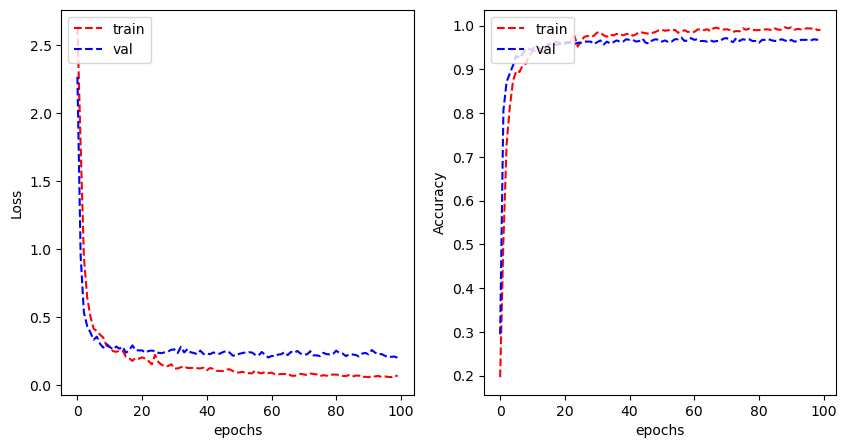

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

### Data Augmentation

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=15, width_shift_range=0.2,
                                  height_shift_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [32]:
model_leNet_aug = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),


    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])


In [33]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_aug.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_leNet_aug.fit(train_generator,
                                    validation_data = validation_generator,
                                    epochs=100, verbose=0)

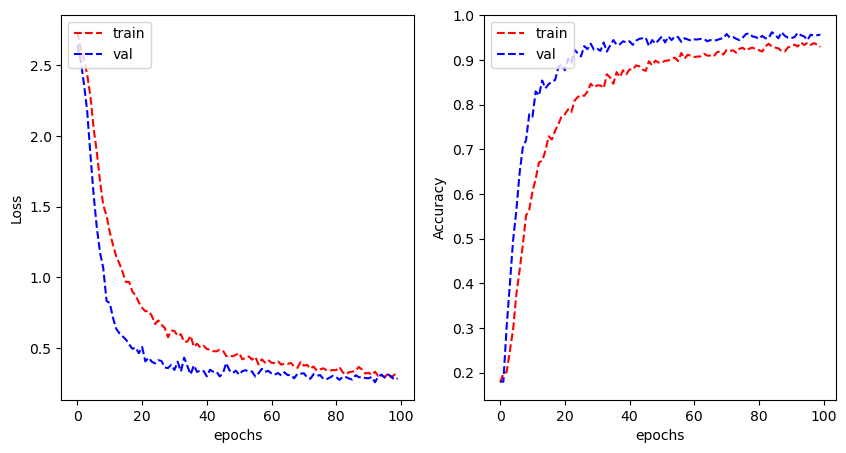

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#
plt.show()

In [35]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_data,
    directory = './',
    x_col = 'image_path',
    y_col = 'sign_type',
    target_size = (28, 28),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 740 validated image filenames belonging to 16 classes.


In [36]:
model_leNet_aug.evaluate(test_generator)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9787 - loss: 0.2077


[0.20630574226379395, 0.9783783555030823]

### Independent Evaluation

In [26]:
ind_directory = "trafficsigns_dataset"

In [27]:
datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Setting 20% of the data for validation
)

#### Converting images

In [28]:
import os
from PIL import Image

def resize_and_convert_images(directory, output_directory, size=(28, 28)):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # goes through directory and sub directories
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                
                file_path = os.path.join(root, filename)
                
                with Image.open(file_path) as img:
                    # Resize the image
                    img = img.resize(size)
                    # Convert the image to greyscale
                    img = img.convert('L')
                    
                    relative_path = os.path.relpath(root, directory)
                    output_path = os.path.join(output_directory, relative_path)
                    if not os.path.exists(output_path):
                        os.makedirs(output_path)
                    
                    output_file_path = os.path.join(output_path, filename)
                    
                    img.save(output_file_path)
                    print(f'Processed {filename}')

input_directory = 'independant_evaluation_dataset'
output_directory = 'evaluation_images'
resize_and_convert_images(input_directory, output_directory)

Processed noparking_1.png
Processed bicycle_1.png
Processed noentry_2.png
Processed noentry_4.png
Processed noentry_3.png
Processed noentry_1.png
Processed limitedtraffic_1.png
Processed limitedtraffic_2.png
Processed traveldirective_2.png
Processed traveldirective_3.png
Processed traveldirective_1.png
Processed traveldirective_4.png
Processed traveldirection_3.png
Processed traveldirection_1.png
Processed traveldirection_2.png
Processed traveldirection_5.png
Processed traveldirection_4.png
Processed speed_2.png
Processed speed_3.png
Processed speed_1.png
Processed speed_4.png
Processed giveway_1.png
Processed warning_3.png
Processed warning_2.png
Processed warning_1.png
Processed warning_5.png
Processed warning_4.png
Processed parking_1.png
Processed parking_2.png
Processed continue_1.png
Processed crossing_1.png
Processed stop_1.png
Processed rightofway_1.png


### predicting image class

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load the image
img_path = 'evaluation_images/diamond/rightofway/rightofway_1.png'
img = load_img(img_path, target_size=(28, 28))  # Resize image to 28x28

# Convert the image to array
img_array = img_to_array(img)

# Normalize the image array (if your model was trained on normalized data)
img_array /= 255.0

# Since the model expects a batch of images, we add an additional dimension
img_array = np.expand_dims(img_array, axis=0)

# Ensure the input shape is (28, 28, 3) as expected by the first layer
assert img_array.shape == (1, 28, 28, 3)

In [30]:
# Predict the class
predictions = model_leNet.predict(img_array)

# Get the index of the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted class index: [9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


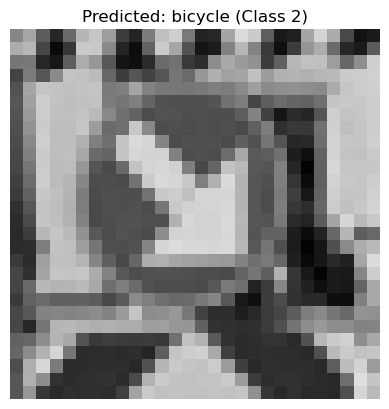

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


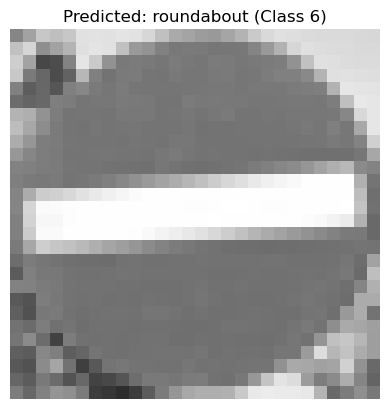

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


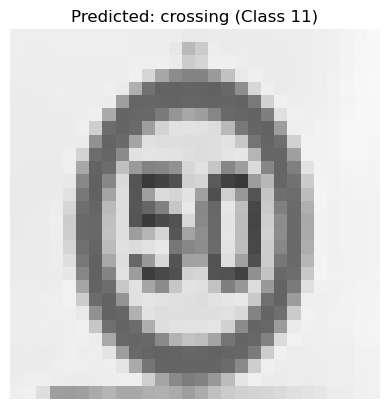

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


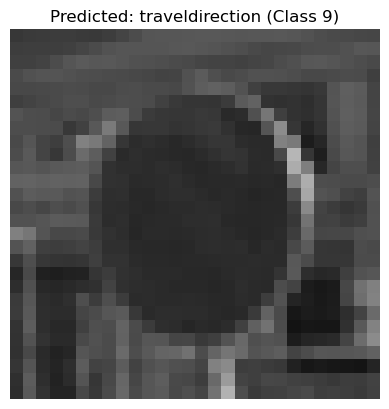

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


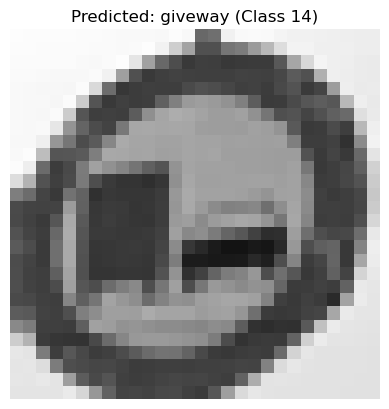

In [40]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
keras.config.enable_unsafe_deserialization()


root_folder_path = 'evaluation_images'


class_names = ['rightofway','stop','bicycle','limitedtraffic','noentry','noparking','roundabout','speed','trafficdirective','traveldirection','continue',
                         'crossing','laneend','parking','giveway','warning']  

#model = tf.keras.models.load_model('sign_type.keras')


def preprocess_image(image_path):
    """Load and preprocess an image."""
    img = image.load_img(image_path, target_size=(28, 28))  
    img_array = image.img_to_array(img)
    img_array /= 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array, img

def predict_image_class(model, image_path):
    """Predict the class of an image using the given model."""
    img_array, img = preprocess_image(image_path)
    predictions = model_leNet_aug.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    return predicted_class_idx, class_names[predicted_class_idx], img

# List all images in the folder and subfolders
image_files = []
for dirpath, dirnames, filenames in os.walk(root_folder_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(dirpath, filename))

# Randomly select 5 images
selected_images = random.sample(image_files, min(5, len(image_files)))  # Ensure not to exceed the list length

# Predict the class for each selected image and display the image
for img_file in selected_images:
    predicted_class_idx, predicted_class_name, img = predict_image_class(model_leNet_aug, img_file)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name} (Class {predicted_class_idx})")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()